#  Simple Linear Regression

In this notebook, we learn how to use scikit-learn to implement simple linear regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate your model using test set, and finally use model to predict unknown value.

## Import needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

## Loading the data

In [7]:
data_set = pd.read_csv('./FuelConsumption.csv')

# take a look at the dataset
data_set.head() # shows first five rows

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Understanding the data
- our target variable is 'CO2EMISSIONS' column and rest are our features.

In [8]:
data_set.dtypes # shows which columns contains which data type

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [9]:
data_set.isna().sum() # as the result shows, we have no NaN values to deal with

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

## EDA

In [10]:
# summerize the data
data_set.describe() #sums up numerical features only

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


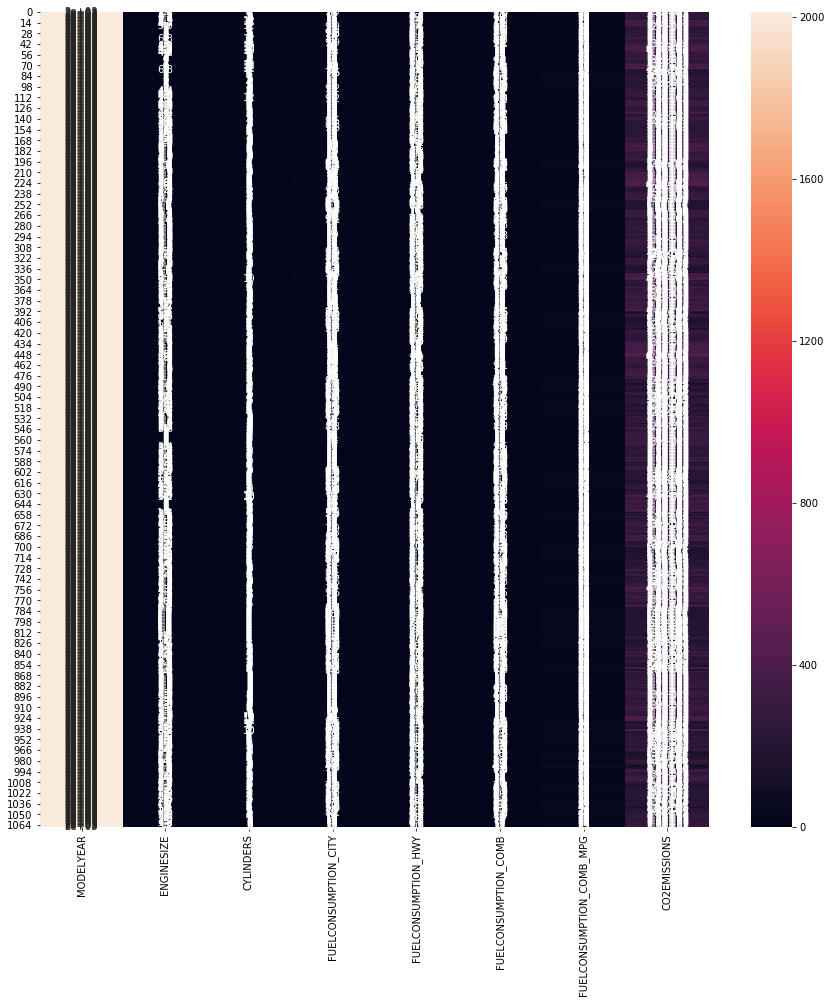

In [20]:
import seaborn as sns
data_numeric = data_set.dtypes.to_dict()
data_numeric = data_set.drop([key for key, _ in data_numeric.items() if data_numeric[key] == 'object'], axis=1)
plt.figure(figsize=(15, 15))
sns.heatmap(data_numeric,
            vmin=-1,
            annot=True)
plt.show()

In [21]:
data_numeric.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244


In [22]:
data_numeric.columns

Index(['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [39]:
final_features = data_numeric.drop(columns=['MODELYEAR', 'FUELCONSUMPTION_CITY',
                          'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB_MPG'])

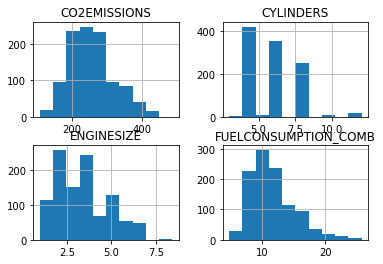

In [40]:
final_features.hist()
plt.show()

In [43]:
msk = np.random.rand(len(data_set)) < 0.8
msk.shape

(1067,)

In [36]:
final_features.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


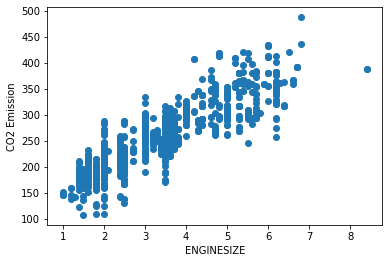

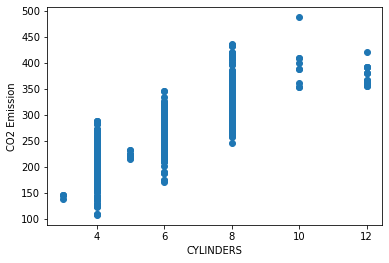

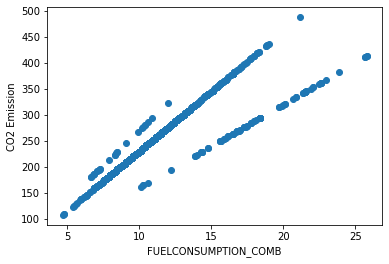

In [47]:
features = final_features.columns.to_list()
#print(features)
for feature in features[:-1]:
    plt.figure()
    plt.scatter(final_features[feature], final_features.CO2EMISSIONS)
    plt.xlabel(feature)
    plt.ylabel('CO2 Emission')
    plt.show()

As we can see, only EngineSize can be fitted into a regression line against CO2 Emissions.

In [61]:
# preparing our train and test data
from sklearn.model_selection import train_test_split

target = final_features.CO2EMISSIONS
feature = final_features.ENGINESIZE
X_train, X_test, y_train, y_test = train_test_split(np.asarray(feature),
                                                   np.asarray(target),
                                                   test_size=0.2,
                                                   random_state=42)

In [62]:
print(X_train.shape,
     y_train.shape,
     X_test.shape,
     y_test.shape)

(853,) (853,) (214,) (214,)


### Visualize out train and test data

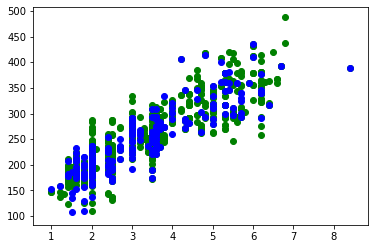

In [52]:
plt.figure()
plt.scatter(X_train, y_train, color='g')
plt.scatter(X_test, y_test, color='blue')

## Create our LR model

In [63]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
print(lr.coef_)
print(lr.intercept_)

[[38.99297872]]
[126.28970217]


### Evaluate the model

In [71]:
y_predicted = lr.predict(X_test.reshape(-1, 1))

from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error

print('Mean absolute error: %.2f' % mean_absolute_error(y_test.reshape(-1, 1), y_predicted))
#print('Accuracy: %.2f' % accuracy_score(y_test.reshape(-1, 1), y_predicted))
print('R2 score: %.2f' % r2_score(y_test.reshape(-1, 1), y_predicted))

Mean absolute erro: 24.10
R2 score: 0.76


### Evalution Metrics summary
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error.
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

### Plot the outputs

No handles with labels found to put in legend.


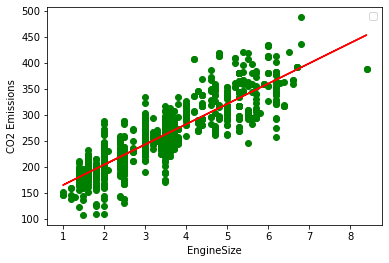

In [74]:
plt.scatter(final_features.ENGINESIZE, final_features.CO2EMISSIONS, color='g')
plt.plot(final_features.ENGINESIZE, lr.coef_[0][0] * final_features.ENGINESIZE + lr.intercept_[0], 'r')
plt.xlabel('EngineSize')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()